<a href="https://colab.research.google.com/github/Renator12/DATA-SCIENCE-PROJECTS-TMU/blob/main/natural_language_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt

--2024-04-02 23:42:13--  https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt
Resolving ocw.mit.edu (ocw.mit.edu)... 151.101.194.133, 151.101.66.133, 151.101.2.133, ...
Connecting to ocw.mit.edu (ocw.mit.edu)|151.101.194.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5458199 (5.2M) [text/plain]
Saving to: ‘t8.shakespeare.txt’

t8.shakespeare.txt  100%[===================>]   5.21M  --.-KB/s    in 0.1s    

2024-04-02 23:42:14 (51.9 MB/s) - ‘t8.shakespeare.txt’ saved [5458199/5458199]



In [2]:
import re
from collections import Counter

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import *
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
#read in text file
file=open('t8.shakespeare.txt','r')


In [4]:
#create list of words from text
word_set=set()
for line in file:
  for word in line.split():
    word_set.add(word)


In [5]:
#word list from set
word_list=list(word_set)
word_list[:50]

['Hercules!',
 'Gods,',
 'near,',
 'denials.',
 'Interprets',
 'not"',
 'rendezvous.',
 'well?',
 'uses',
 "'em!",
 'provide',
 'calendar?',
 'vaward.',
 'ways!',
 'begin?',
 'warrior,',
 'slays',
 'posterns,',
 'Frogmore;',
 'arrogant',
 'dissolves',
 "Archdeacon's",
 'consanguinity,',
 'VIOLA',
 "discharg'd",
 'noses;',
 'apples!',
 'flows',
 'vixen',
 'Scant',
 'passages',
 'cuckold-maker',
 'garde,',
 "crav'd,",
 'schoolboy',
 'Seek!',
 'grow,',
 'forgetful.',
 'prevailed?',
 "anatomiz'd",
 '[Kneels]',
 'differs.',
 'Power.',
 "confirm'd",
 'WRITE',
 'tidings',
 'assuage',
 "serv'st",
 'Soothsayer.',
 'porn.']

In [6]:
#sentences dumped into an array
sentence_set=[]
with open('t8.shakespeare.txt','r') as file:

  for line in file:
    sentence_set.append(line)

In [7]:
#first 10 sentences
sentence_set[:10]

['This is the 100th Etext file presented by Project Gutenberg, and\n',
 'is presented in cooperation with World Library, Inc., from their\n',
 'Library of the Future and Shakespeare CDROMS.  Project Gutenberg\n',
 'often releases Etexts that are NOT placed in the Public Domain!!\n',
 '\n',
 'Shakespeare\n',
 '\n',
 '*This Etext has certain copyright implications you should read!*\n',
 '\n',
 '<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM\n']

In [8]:
#function to remove punctuations
def remove_signs(text):
    # Define a regular expression pattern to match signs
    sign_pattern = r'[.,\/#!$%\^&\*;:{}=\-_`~()\n<<>>]'

    # Use re.sub() to replace all matches of the pattern with an empty string
    cleaned_text = re.sub(sign_pattern, '', text)

    return cleaned_text

In [9]:
#remove punctuations and empty lines
word_no_punc=list(map(remove_signs,word_list))
sentence_no_punc=list(map(remove_signs,sentence_set))
sentence_no_punc=[string for string in sentence_no_punc if string!='']
word_no_punc=[string for string in word_no_punc if string!='']


In [10]:
#sentence_no_punc

In [11]:
#get the 10 words

word_count_dict=Counter(word_no_punc)
list(word_count_dict.items())[:10]

[('Hercules', 5),
 ('Gods', 3),
 ('near', 7),
 ('denials', 2),
 ('Interprets', 1),
 ('not"', 1),
 ('rendezvous', 3),
 ('well?', 1),
 ('uses', 3),
 ("'em", 6)]

In [12]:
#get the 10 most frequent words

word_count_dict.most_common(10)

[('me', 12),
 ('it', 12),
 ('tonight', 12),
 ('you', 11),
 ('tomorrow', 11),
 ('so', 11),
 ('her', 11),
 ('is', 11),
 ('souls', 10),
 ('all', 10)]

In [13]:
#get all stop words from nltk
stop_words = set(stopwords.words('english'))


In [14]:
#find all stop words in our word list
filtered_words=[(word,val) for (word,val) in word_count_dict.most_common() if word in stop_words]

In [15]:
#most_common stop words
filtered_words[:10]

[('me', 12),
 ('it', 12),
 ('you', 11),
 ('so', 11),
 ('her', 11),
 ('is', 11),
 ('all', 10),
 ('not', 10),
 ('him', 10),
 ('now', 10)]

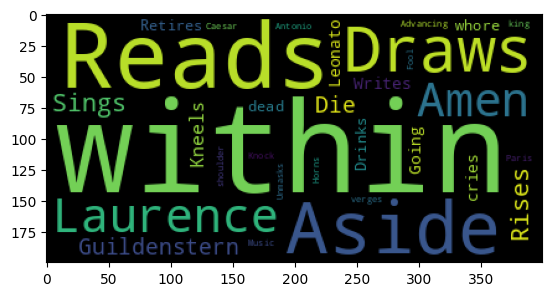

In [16]:
#using word cloud
wc = WordCloud(max_words=1000, stopwords=stop_words, margin=10, random_state=1).generate(''.join(word_no_punc))
plt.imshow(wc)

In [17]:
#stemming and lemitzation
stemmed_sentences=[]
lemamtized_sentences=[]
stemmer = PorterStemmer()
wnl = WordNetLemmatizer()
for x in (sentence_no_punc):
  stemmed_sentences.append(stemmer.stem(x))
  lemamtized_sentences.append(wnl.lemmatize(x))

In [18]:
#first 10 stemmed sentences
stemmed_sentences[:10]

['this is the 100th etext file presented by project gutenberg and',
 'is presented in cooperation with world library inc from their',
 'library of the future and shakespeare cdroms  project gutenberg',
 'often releases etexts that are not placed in the public domain',
 'shakespear',
 'this etext has certain copyright implications you should read',
 'this electronic version of the complete works of william',
 'shakespeare is copyright 19901993 by world library inc and i',
 'provided by project gutenberg etext of illinois benedictine colleg',
 'with permission  electronic and machine readable copies may b']

In [19]:
#original sentences first 10
sentence_no_punc[:10]

['This is the 100th Etext file presented by Project Gutenberg and',
 'is presented in cooperation with World Library Inc from their',
 'Library of the Future and Shakespeare CDROMS  Project Gutenberg',
 'often releases Etexts that are NOT placed in the Public Domain',
 'Shakespeare',
 'This Etext has certain copyright implications you should read',
 'THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM',
 'SHAKESPEARE IS COPYRIGHT 19901993 BY WORLD LIBRARY INC AND IS',
 'PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE',
 'WITH PERMISSION  ELECTRONIC AND MACHINE READABLE COPIES MAY BE']

In [20]:
#first 10 lemmatized sentences
lemamtized_sentences[:10]

['This is the 100th Etext file presented by Project Gutenberg and',
 'is presented in cooperation with World Library Inc from their',
 'Library of the Future and Shakespeare CDROMS  Project Gutenberg',
 'often releases Etexts that are NOT placed in the Public Domain',
 'Shakespeare',
 'This Etext has certain copyright implications you should read',
 'THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM',
 'SHAKESPEARE IS COPYRIGHT 19901993 BY WORLD LIBRARY INC AND IS',
 'PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE',
 'WITH PERMISSION  ELECTRONIC AND MACHINE READABLE COPIES MAY BE']

In [21]:
#Stemming puts everything into lower case while lemmatization clearly does not. Stemming cuts off word endings, while lemmatization finds
#the base form with meaning. Stemming is quick but less accurate, while lemmatization is slower but more accurate.
#Pick based on speed or accuracy.
